# Projet numérique : choix du pas de temps

**CLODION Sandra, ROSSI Sophie**

In [1]:
# imports
import math
from math import *
import matplotlib.pyplot as plt
import numpy as np
from scipy import linalg
%matplotlib inline

## Partie 1: Pas fixe

On étudie l'équation différentielle:

\begin{aligned}
& \dot{x}(t) = f(t,x(t)) \\
& x(t=0) = x_{0}
\end{aligned}

où $f: \mathbb{R}^{n} \rightarrow \mathbb{R}^{m}$ est au moins $C^{0}$ afin d'assurer l'existence des solutions (théorème de Peano-Arzela). Dans notre exemple, on choisit $f$ qui est $C^{1}$ de sorte que la solution existe et soit unique (théorème de Cauchy-Lipschitz):
\begin{aligned}
f: \mathbb{R}^{2} &\rightarrow \mathbb{R} \\
(t,x) & \mapsto -tx
\end{aligned}

Donc la solution est $x(t) = x_{0}exp (-\frac{t^{2}}{2})$ (qui se calcule aisément par la méthode de séparation de variables). 


*Nota Bene*: 

Dans toute cette partie, on se place dans le cas unidimentionnel (on a choisi comme exemple $f: \mathbb{R}^{2} \rightarrow \mathbb{R}$). 

Toutefois, nos les méthodes restent valables en dimension supérieure: il suffit de les coder en utilisant des vecteurs (bibliothèque numpy). En particulier, lorsque l'on calcule l'erreur, on remplace la valeur absolue par la norme (euclidienne par exemple). Un exemple de code est donné à la fin de cette partie, pour la méthode d'Euler explicite.

In [2]:
def get_f():
    def f(t, x):
        return -t*x
    return(f)
f = get_f()

def get_g(): # solution exacte de l'équation différentielle
    def g(t):
        return exp(-(t**2)/2)
    return g
g = get_g()

def get_h(): # exemple de fonctions en dimension supérieure
    def h(x):
        return np.array([-2*x[1] + x[0], x[0]])
    return(h)
h = get_h()

### Schéma d'Euler

In [3]:
def solve_euler_explicite(f, x0, dt, tf, t0 = 0):
    
    # initialisation
    t, x = [], []
    x.append(x0)
    t.append(t0)
    tj, xj = t0, x0
    
    # itérations
    while tj < tf:
        tj += dt
        xj += dt*f(tj, xj)
        t.append(tj)
        x.append(xj)

    return t, x

In [4]:
t,x = solve_euler_explicite(f, 1, 0.01, 4) # un exemple d'application

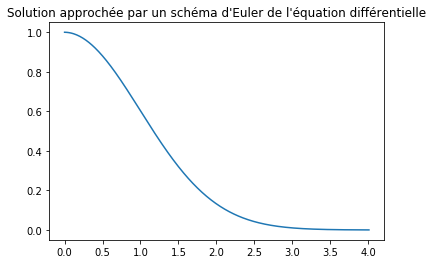

In [5]:
plt.plot(t, x)
plt.title("Solution approchée par un schéma d'Euler de l'équation différentielle")
plt.show()

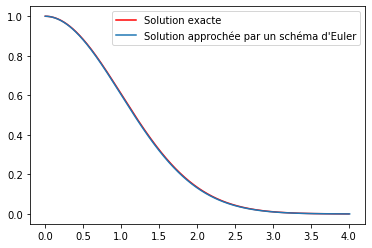

In [6]:
X = list(np.linspace(0, 4, 1000))
Y = [g(i) for i in X]
plt.plot(X, Y, color='red',label="Solution exacte")   
plt.plot(t, x, label="Solution approchée par un schéma d'Euler")
plt.legend()
plt.show()

La solution approchée et la solution exacte semblent se superposer: ceci illustre bien le fait que le schéma d'Euler converge vers la solution de l'équation différentielle.

#### Calcul de l'erreur

On introduit deux fonctions: 
+ max_norme(x1, x2) qui, pour deux listes x1, x2 calcule le maximum de leur différence terme à terme
+ erreur_globale qui correspond à l'erreur maximale commise entre la solution exacte et la solution approchée

In [7]:
def max_norme(x1, x2):
    # on appelle m le max qu'on initialise à 0
    m = 0
    for j in range(len(x)):
        if abs(x1[j]-x2[j])>m:
            m = abs(x1[j]-x2[j])
    return m

In [8]:
def erreur_globale(t, x, g):
    """t, x sont les valeurs renvoyées par le schéma numérique 
    et g est la fonction qui est solution exacte de l'équation différentielle"""
    xx = []
    for t1 in t:
        xx.append(g(t1))
    e = max_norme(x, xx)
    return e

In [9]:
# Quelques exemples d'application:

e = erreur_globale(t, x, g)
print(e)

0.004371916843330048


In [10]:
t2, x2 = solve_euler_explicite(f, 1, 0.00001, 4)

e2 = erreur_globale(t2, x2, g)
print(e2)

2.0049946147793207e-08


On voit bien que si le pas diminue, alors l'erreur globale également, ce qui revient à dire que la solution approchée tend vers la solution exacte lorsque le pas de temps tend vers 0.

Afin de mieux visualiser cette convergence, on trace l'erreur globale en fonction du pas de temps. Par souci de clarté, on prend une échelle logarithmique dans les graphiques.

In [11]:
tf = 4
pas_temps = list(np.arange(10**(-3), 10**(-1), 10**(-4)))

erreurs_euler = []

for pas in pas_temps:
    t, x = solve_euler_explicite(f, 1, pas, tf)
    erreurs_euler.append(erreur_globale(t, x, g))

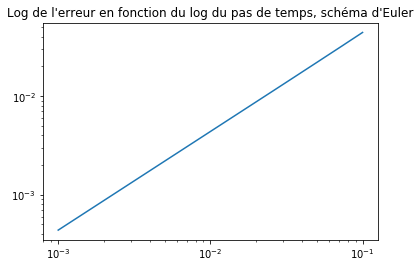

In [12]:
plt.yscale("log")
plt.xscale("log")
plt.plot(pas_temps, erreurs_euler)
plt.title("Log de l'erreur en fonction du log du pas de temps, schéma d'Euler")
plt.show()

On obtient ce qui ressemble à une droite de pente 1. Ceci est cohérent avec le fait que le schéma d'Euler est convergent à l'ordre 1. 

En effet, converger à l'ordre 1 signifie que $\exists c_v>0$ (indépendent de $dt$) tel que $ \max_{1 \leq j \leq J} |x^j - x(t_j)| \leq c_v (dt) $ donc par passage au log: $ log(\max_{1 \leq j \leq J} |x^j - x(t_j)|)\leq c_v + log(dt).$ Ceci correspond donc à une droite de pente 1.

### Schéma de Heun (ordre 2)

In [13]:
def solve_heun(f, x0, dt, tf, t0 = 0):
    # initialisation
    t, x = [], []
    x.append(x0)
    t.append(0)
    tj, xj = t0, x0
    
    # récurrence
    while tj < tf:
        tj1 = tj + dt
        xj1 = xj + dt/2*(f(tj, xj) + f(tj1, xj + dt*f(tj, xj)))
        t.append(tj1)
        x.append(xj1)
        tj, xj = tj1, xj1
    return t, x

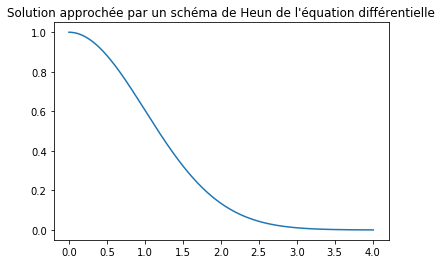

In [14]:
t, x = solve_heun(f, 1, 0.01, 4)

plt.plot(t, x)
plt.title("Solution approchée par un schéma de Heun de l'équation différentielle")
plt.show()

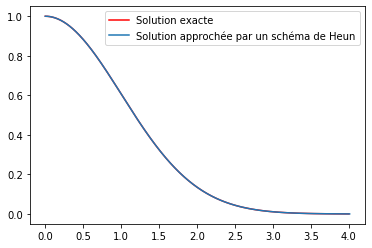

In [15]:
X = list(np.linspace(0, 4, 1000))
Y = [g(i) for i in X]
plt.plot(X, Y, color='red',label="Solution exacte")   
plt.plot(t, x, label="Solution approchée par un schéma de Heun")
plt.legend()
plt.show()

#### Calcul de l'erreur

In [16]:
# Un exemple d'application
t, x = solve_heun(f, 1, 0.001, 4)

e = erreur_globale(t, x, g)
print(e)

9.029800623894246e-08


In [17]:
tf = 4
pas_temps = list(np.arange(10**(-3), 10**(-1), 10**(-4)))

erreurs_heun = []

for pas in pas_temps:
    t, x = solve_heun(f, 1, pas, tf)
    erreurs_heun.append(erreur_globale(t, x, g))

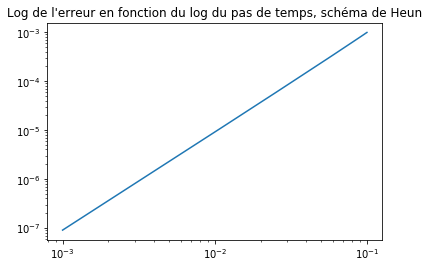

In [18]:
plt.yscale("log")
plt.xscale("log")
plt.plot(pas_temps, erreurs_heun)
plt.title("Log de l'erreur en fonction du log du pas de temps, schéma de Heun")
plt.show()

On remarque qu'on obtient ce qui ressemble à une droite de pente 2, ce qui est cohérent avec le fait que le schéma de Heun soit convergent à l'ordre 2.

En effet, converger à l'ordre 2 signifie que $\exists c_v>0$ (indépendent de $dt$) tel que $ \max_{1 \leq j \leq J} |x^j - x(t_j)| \leq c_v (dt)^2 $ donc par passage au log: $ log(\max_{1 \leq j \leq J} |x^j - x(t_j)|)\leq c_v + 2log(dt).$ Ceci correspond donc à une droite de pente 2.

### Comparaison des 2 schémas étudiés

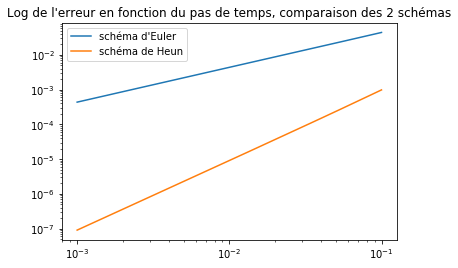

In [19]:
plt.xscale("log")
plt.yscale("log")
plt.plot(pas_temps, erreurs_euler, label = "schéma d'Euler")
plt.plot(pas_temps, erreurs_heun, label = "schéma de Heun")
plt.legend()
plt.title("Log de l'erreur en fonction du pas de temps, comparaison des 2 schémas")
plt.show()

### Exemple de code en dimension supérieure

Voici la version de la méthode d'euler explicite en plusieurs dimensions: 

In [20]:
def solve_euler_explicite1(f, x0, dt, tf, t0 = 0):
    
    # initialisation
    t, x = [t0], [x0]
    tj, xj = t0, x0
    
    # itérations
    while tj < tf:
        tj += dt
        xj += dt*f(xj)
        t = np.vstack([t, tj])
        x = np.vstack([x, xj])
    
    return t, x.T

In [21]:
t,x = solve_euler_explicite1(h, np.array([0.1, 0.1]), 0.1, 10.0)

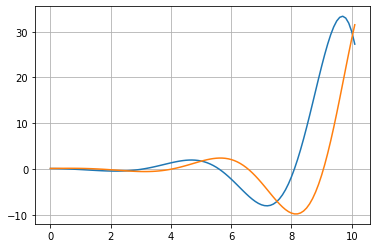

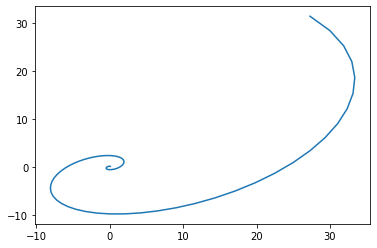

In [22]:
plt.figure()
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.grid(True)
plt.figure()
plt.plot(x[0],x[1])

## Partie 2: Adaptation du pas de temps

### Question 1

On suppose que $f$ est $C^{1}$. 

Comme $f$ est $C^{1}$, la solution $x$ est $C^{2}$. 

L'erreur (absolue) locale est définie par:
$e^{j+1} = x^{j} + \int_{t_j}^{t_{j+1}} f(s,x(s))\mathrm{ds} -x^{j+1} = o(\Delta t_j ^{2})$

Dans la définition de $e^{j+1}$, $x^j + \int_{t_j}^{t_{j+1}} f(s,x(s))\mathrm{ds}$ est ici la valeur de la vraie solution au temps $t_{j+1}$ si elle était initialisée à $x^{j}$ au temps $t_{j}$ $\textit{ie}$:

$x^j + \int_{t_j}^{t_{j+1}} f(s,x(s))\mathrm{ds} = x(t_{j+1})$ où $x$ est solution de:

\begin{aligned}
\dot{x}(t) & = f(t,x(t)) \\
x(t_{j}) & = x^{j}
\end{aligned}

Par développement de Taylor à l'ordre 2 (qui est bien défini car $x$ est $C^{2}$): 
\begin{aligned}
x(t_{j+1}) & = x(t_{j}+\Delta t_{j})\\
&= x(t_{j})+\Delta t_{j}\dot{x}(t_{j})+ \frac{\Delta t_j^{2}}{2} \frac{\mathrm{d^{2}}}{\mathrm{dt^{2}}}x(t_{j}) + o(\Delta t_j ^{2})\\
&= x^{j}+\Delta t_{j}f(t_{j},x^{j})+ \frac{\Delta t_j^{2}}{2} \frac{\mathrm{d^{2}}}{\mathrm{dt^{2}}}x(t_{j}) + o(\Delta t_j ^{2})\\
&= x^{j+1}+ \frac{\Delta t_j^{2}}{2} \frac{\mathrm{d^{2}}}{\mathrm{dt^{2}}}x(t_{j})+O(\Delta t_j ^{3})
\end{aligned} (où la dernière égalité est vraie du moment que x est $C^{3}$ donc pour f $C^{2}$ a fortiori).

Donc $e^{j+1} = \frac{\Delta t_j^{2}}{2} \frac{\mathrm{d^{2}}}{\mathrm{dt^{2}}}x(t_{j})+ O(\Delta t_j ^{3})$ où $\frac{\mathrm{d^{2}}}{\mathrm{dt^{2}}}x(t_{j}) = \partial_{t}f(t_{j},x(t_{j})) + \partial_{x}f(t_{j},x(t_{j}))f(t_{j},x(t_{j}))$

D'autre part: 
\begin{align}
f(t_{j+1},x^{j+1}) &= f(t_{j}+\Delta t_{j}, x(tj)+\Delta t_{j}f(t_{j}, x(t_{j}))\\
&= f(t_{j},x(t_{j})) + \Delta t_{j} (\partial_{t}f(t_{j},x(t_{j})) + \partial_{x}f(t_{j},x(t_{j}))f(t_{j},x(t_{j})) + O(\Delta t_j ^{3})
\end{align}

Donc, par unicité du développement limité en 0: $\frac{\Delta t_{j}}{2}(f(t_{j+1}, x^{j+1})-f(t_{j}, x^{j})) = e^{j+1} +O(\Delta t_j ^{3})$

Finalement: $ \big\| e^{j+1} \big\| = \frac{\Delta t_{j}}{2}\big\| f(t_{j}, x^{j}) - f(t_{j+1}, x^{j+1}) \big\| +O(\Delta t_j ^{3})$


### Question 2

On va montrer que l'erreur (absolue) locale vérifie: $e^{j+1} = O({\Delta t}_j^2)$.

Par développement de Taylor à l'ordre 1 uniquement:
\begin{aligned}
x(t_{j+1}) & = x(t_{j}+\Delta t_{j})\\
&= x(t_{j})+\Delta t_{j}\dot{x}(t_{j})+O(\Delta t_j ^{2})\\
&= x^{j}+\Delta t_{j}f(t_{j},x^{j})+O(\Delta t_j ^{2})\\
&= x^{j+1}+O(\Delta t_j ^{2})
\end{aligned}
Finalement $e^{j+1} = x^{j} + \int_{t_j}^{t_{j+1}} f(s,x(s))\mathrm{ds}) -x^{j+1} = O(\Delta t_j ^{2})$.

Donc $e^{j+1} = O(\Delta t_j ^{2})$.

Enfin, nous montrons qu'on peut choisir le pas de temps: ${\Delta t}_{new} = {\Delta t_{j}}\sqrt{\frac{\texttt{Tol}_{abs}}{\|e^{j+1}\|}}$

$\texttt{Tol}_{abs} >0$ est tel que l'on ait toujours $\big\| e^{j+1} \big\| \leq \texttt{Tol}_{abs}$.

Comme $e^{j+1} = O(\Delta t_j ^{2})$, on a $\frac{e^{j+1}}{\texttt{Tol}_{abs}} = O(\Delta t_j ^{2})$ et donc $\big\| \frac{e^{j+1}}{\texttt{Tol}_{abs}}\big\| = O(\Delta t_j ^{2})$ *ie*:

$\exists C$ tel que $\big\| e^{j+1} \big\| \leq C\Delta t_j^{2}$ pour $\Delta t_j$ suffisamment petit.

Donc, pour $\Delta t_j$ suffisamment petit: $\big\| \frac{e^{j+1}}{\texttt{Tol}_{abs}}\big\| \leq C\Delta t_j^{2}$ 
*ie* $ \frac{1}{\sqrt C} \leq {\Delta t_{j}}\sqrt{\frac{\texttt{Tol}_{abs}}{\|e^{j+1}\|}}$

On pose donc ${\Delta t}_{new} = {\Delta t_{j}}\sqrt{\frac{\texttt{Tol}_{abs}}{\|e^{j+1}\|}}$.

### Question 3

Cet algorithme reprend la méthode d'euler explicite tout en modifiant le pas à chaque itération, au lieu de le considérer comme fixé. Ceci a pour but d'améliorer la convergence de la méthode.

#### Description de l'algorithme

+ 1ère boucle while: tant que le temps écoulé est inférieur au temps final (entré par l'utilisateur)

    + 2ème boucle while imbriquée: tant que le temps (de calcul, stockage etc.) entre 2 itérations (*ie* depuis le dernier stockage) est inférieur à dtmax
    
        + incrémentation des tj, tintermédaires, et x_next avec la formule du schéma d'euler explicite
        
        + $x_{next} = x + dtf(x)$ et on a montré que $e^{j+1} = {\Delta t}\, \frac{\big\|f(t_{j+1},x^{j+1}) - f(t_j,x^j)\big\|}{2} + O({\Delta t}_j^3) $ 
        
        On a : $x_{next}-dtf(x_{next}) = x_{next}-dtf(x_{next})-x$ *ie* $x_{back}-x = dt(f(x)-f(x_{next})$ 
        donc $ \big\| e^{j+1} \big\|= \frac{\big\|x_{back}-x \big\|}{2} $ environ. 
        
        Donc à chaque itération est calculé le nouveau pas de temps (adapté) $\Delta t_{new}$ (l. 12)
        
        Le facteur 0.9 devant n'est qu'une marge que l'on se donne au préalable.
        
        + réajustement du dt pour qu'il ne soit pas trop proche de dtmax du moment qu'il est supérieur à dtmin, puis itération de toutes les quantités. 
        Par contre, si dt<dtmin l'algorithme s'arrete avec un message d'erreur. 
        
        + ajout de t_next à ts (verticalement) et x_next à xs
        
+ l'algorithme retourne le vecteur ts et la transposée de xs (non pas xs afin de faciliter le plot)
        


#### Illustration du fonctionnement de l'algorithme

L'algorithme donné est valable pour une équation homogène.

Or, dans notre exemple on étudie une équation non homogène: on a donc adapté l'algorithme de sorte qu'il itère aussi sur le temps.

In [23]:
def solve_ivp_euler_explicit_variable_step1(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(t, x)
            x_back = x_next - dt * f(t_next, x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt =  0.9*dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(t, x)
        ts = np.vstack([ts,t_next])
        xs = np.vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

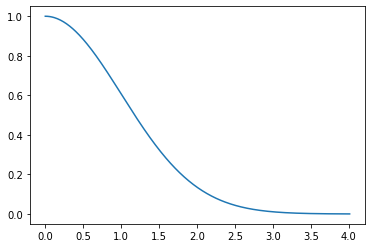

In [24]:
t, x = solve_ivp_euler_explicit_variable_step1(f, 0, 1, 4)

plt.plot(t, x.T)
plt.show()

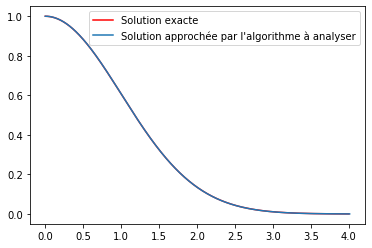

In [25]:
X = list(np.linspace(0, 4, 1000))
Y = [g(i) for i in X]
plt.plot(X, Y, color='red',label="Solution exacte")   
plt.plot(t, x.T, label="Solution approchée par l'algorithme à analyser")
plt.legend()
plt.show()

**Illustration du pas de temps variable**

In [26]:
print(t.T)

[[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
  0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
  0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
  0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
  0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
  0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
  0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.95 0.96 0.97
  0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06 1.07 1.08 1.09 1.1  1.11
  1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.19 1.2  1.21 1.22 1.23 1.24 1.25
  1.26 1.27 1.28 1.29 1.3  1.31 1.32 1.33 1.34 1.35 1.36 1.37 1.38 1.39
  1.4  1.41 1.42 1.43 1.44 1.45 1.46 1.47 1.48 1.49 1.5  1.51 1.52 1.53
  1.54 1.55 1.56 1.57 1.58 1.59 1.6  1.61 1.62 1.63 1.64 1.65 1.66 1.67
  1.68 1.69 1.7  1.71 1.72 1.73 1.74 1.75 1.76 1.77 1.78 1.79 1.8  1.81
  1.82 1.83 1.84 1.85 1.86 1.87 1.88 1.89 1.9  1.91 1.92 1.93 1.

**Exemple d'implémentation pour une fonction à plusieurs variables**

Cette fois-ci on considère une équation homogène; on utilise donc l'algorithme donné sans le modifier.

In [27]:
def get_h():
    def h(x):
        return np.array([-2*x[1] + x[0], x[0]])
    return(h)
h = get_h()

In [28]:
def solve_ivp_euler_explicit_variable_step(f, t0, x0, t_f, dtmin = 1e-16, dtmax = 0.01, atol = 1e-6):
    dt = dtmax/10; # initial integration step
    ts, xs = [t0], [x0]  # storage variables
    t = t0
    ti = 0  # internal time keeping track of time since latest storage point : must remain below dtmax
    x = x0
    while ts[-1] < t_f:
        while ti < dtmax:
            t_next, ti_next, x_next = t + dt, ti + dt, x + dt * f(x)
            x_back = x_next - dt * f(x_next)
            ratio_abs_error = atol / (linalg.norm(x_back-x)/2)
            dt = 0.9 * dt * sqrt(ratio_abs_error)
            if dt < dtmin:
                raise ValueError("Time step below minimum")
            elif dt > dtmax/2:
                dt = dtmax/2
            t, ti, x = t_next, ti_next, x_next
        dt2DT = dtmax - ti # time left to dtmax
        t_next, ti_next, x_next = t + dt2DT, 0, x + dt2DT * f(x)
        ts = np.vstack([ts,t_next])
        xs = np.vstack([xs,x_next])
        t, ti, x = t_next, ti_next, x_next
    return (ts, xs.T)

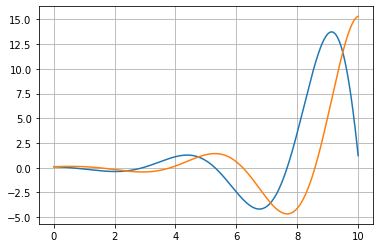

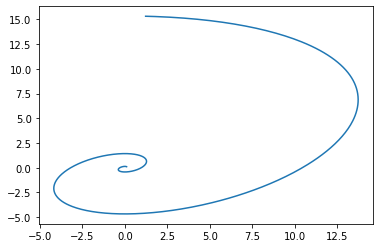

In [29]:
t0, tf, x0 = 0.0, 10.0, np.array([0.1, 0.1])
t, x = solve_ivp_euler_explicit_variable_step(h, t0, x0, tf)

plt.figure()
plt.plot(t, x[0])
plt.plot(t, x[1])
plt.grid(True)
plt.figure()
plt.plot(x[0],x[1])

In [134]:
print(t)

[[0.000e+00]
 [1.000e-02]
 [2.000e-02]
 ...
 [9.990e+00]
 [1.000e+01]
 [1.001e+01]]
